In [14]:
"""This is parser for creating in input for visualizer from output of system of imitation modelling. 
You have to specify the output file to run parser."""

class INTERVAL:
    task_intervals = {}
    def create_int(self, filename):
        with open(filename, "r") as file:
            txt_list = file.read().split()
            for i in range(len(txt_list)): 
                if txt_list[i] == "<task":
                    this_name = txt_list[i+2].split('\"')[-2]
                    self.task_intervals[this_name] = []
                    while True:
                        while txt_list[i].split("=")[0] != "time" and txt_list[i] != "</task>":
                            i+=1
                        if txt_list[i].split("=")[0] == "time":
                            this_time = txt_list[i].split("\"")[-2]
                            self.task_intervals[this_name].append(this_time)
                            i+=1
                        else:
                            break
        return self.task_intervals

    def print_intervals(self):
        print(self.task_intervals)

        
        
        
#"4_fault_43.out"
tmp = INTERVAL()
"""Here specify input file."""
inter = tmp.create_int("no_fault.out")
tmp.print_intervals()

{'SELECTOR': ['20', '25', '80', '85', '140', '145', '200', '205'], 'task1': ['0', '9'], 'task2': ['9', '15'], 'task3': ['60', '69'], 'task4': ['69', '78'], 'task5': ['129', '138'], 'task6': ['120', '129'], 'task7': ['189', '198'], 'task8': ['180', '189']}


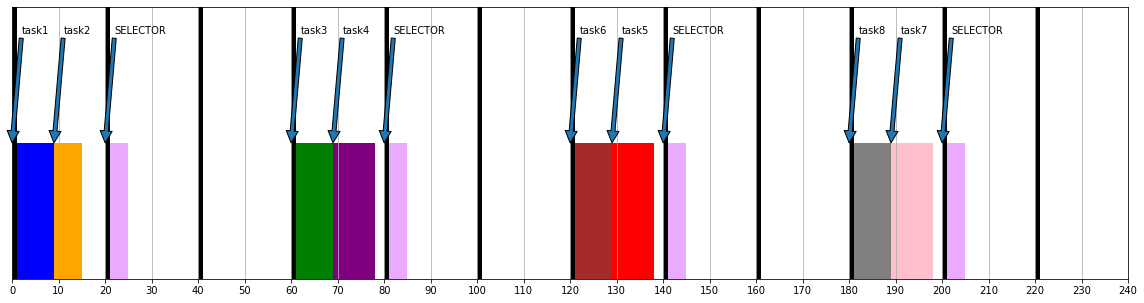

In [16]:
"""This is visualizer of NVP with one kernel mechanism. You must run the parser cell before running this cell. 
Visualizer works with no more than 240 seconds programm."""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class VISUALISER:
    """Class, that visualise given dict with time intervals."""
    
    colours = ['#eaaaff', 'blue', 'orange', 'green', 'purple', 'red', 'brown', 'pink', 'gray', 'olive', 'cyan']

    def visualise(self, dict_inter, filename = "graph.out"):
        """Visualisation using matplotlib."""
        begins = []
        ends = []
        fig, ax = plt.subplots()
        j=0
        for i in dict_inter: 
            begins =list(map(int, dict_inter[i][::2]))
            ends =list(map(int, dict_inter[i][1::2]))
            df = pd.DataFrame({"begin": begins, "end" : ends})
            colour = self.colours[j%len(self.colours)]
            ax.broken_barh(list(zip(df["begin"].values, 
                            (df["end"] - df["begin"]).values)), 
                            (0, 0.5), facecolors=(colour))
            j+=1
            for p in begins:
                ax.annotate(i, (p, 0.5), xytext=((p+2)/240, 0.9), 
                            textcoords='axes fraction', 
                            arrowprops=dict(shrink=0.0001))

        windws = list(map(int, list(np.arange(0, 240, 20))))
        begins = []
        ends = []

        for i in windws:
            begins.append(i)
            ends.append(i+1)
            
        df = pd.DataFrame({"begin": begins, "end" : ends})
        ax.broken_barh(list(zip(df["begin"].values, 
                        (df["end"] - df["begin"]).values)), 
                        (0, 1), facecolors='black')
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 240)
        plt.xticks(np.arange(0, 240+1, 10.0))
        plt.yticks([])
        ax.grid(True)
        fig.set_size_inches(20, 1 * 5, forward=True)
        plt.savefig(filename.split(".")[0] + ".png")


tmp = VISUALISER()
"""Here you can specify name of output file."""
tmp.visualise(inter, "no_fault.out")
    

In [3]:
import numpy as np
tmp = list(map(int, list(np.arange(0, 240, 20))))
type(tmp[0])


int

In [4]:
tmp

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]